In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import empyrical
import scipy.stats as stats
%matplotlib inline

In [235]:
df = pd.read_excel('../data/1090_portRets.xlsx')

In [236]:
df.head()

基本面模型    主动基金模型  market_li
2013-01-04 -0.000409 -0.000490  -0.000481
2013-01-07  0.001192  0.001331   0.001415
2013-01-08  0.000495  0.000524   0.000809
2013-01-09  0.000492  0.000569   0.001113
2013-01-10  0.000459  0.001019   0.000720

In [237]:
ret = df[u'market_li']

In [238]:
empyrical.annual_return(ret)

0.08884885114122532

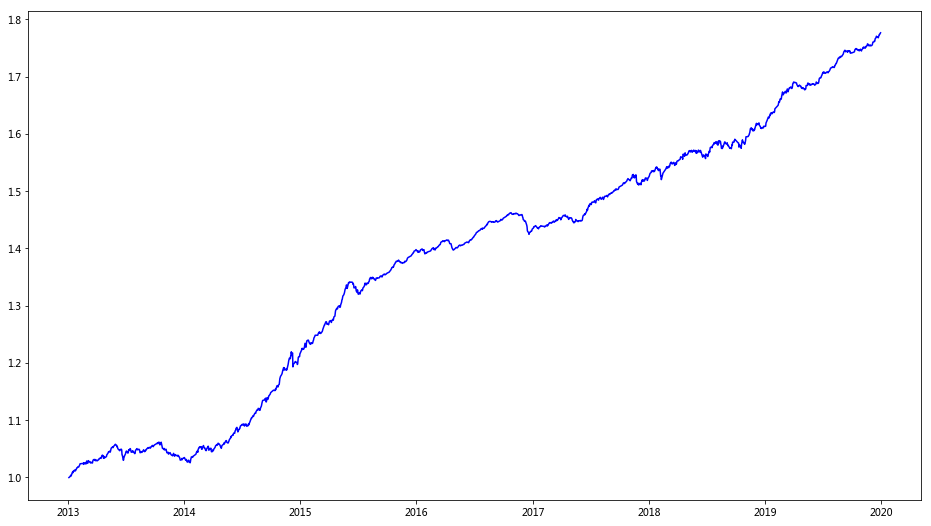

In [239]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot((1+ret).cumprod(), color='blue')

In [240]:
window = 243
his_ann_ret = ret.rolling(window).apply(lambda x: empyrical.annual_return(x)).shift(-window)

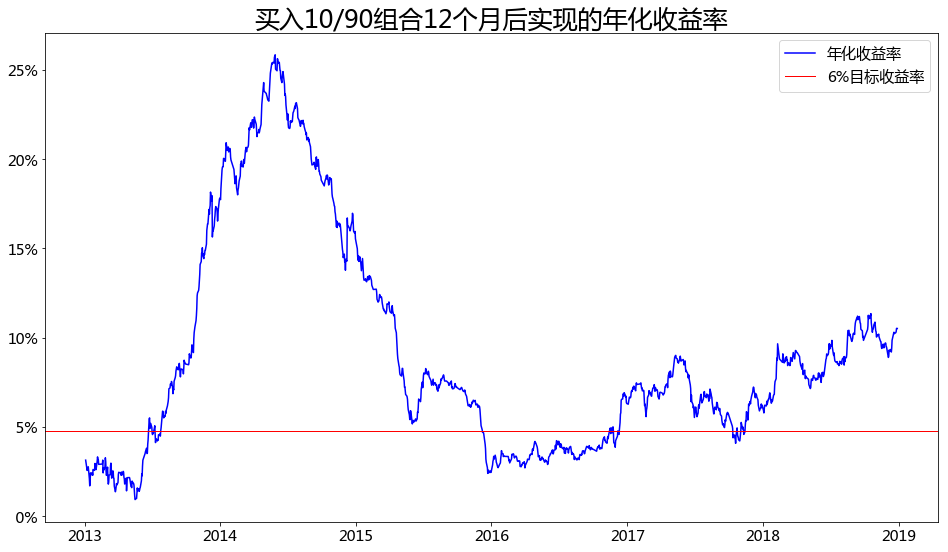

In [241]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(his_ann_ret, color='blue', label=u'年化收益率')
ax.axhline(y=0.0477, color='red', linewidth=1, label=u'6%目标收益率')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.legend(fontsize=15)

# Title
_ = ax.set_title(u'买入10/90组合%d个月后实现的年化收益率'%(window/20), fontsize=25)

In [244]:
fit

array([2.63554537, 2.67016094, 2.67297384, ..., 0.15152952, 0.1503059 ,
       0.14354918])

[Text(0,0,'-5.0%'),
 Text(0,0,'0.0%'),
 Text(0,0,'5.0%'),
 Text(0,0,'10.0%'),
 Text(0,0,'15.0%'),
 Text(0,0,'20.0%'),
 Text(0,0,'25.0%'),
 Text(0,0,'30.0%')]

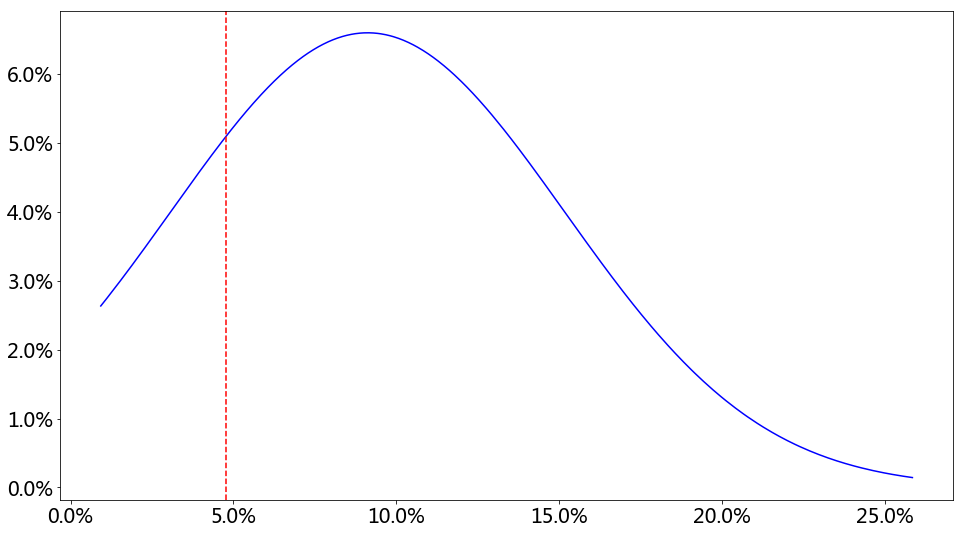

In [243]:
fig, ax = plt.subplots(figsize=(16, 9))

h = sorted(his_ann_ret.dropna().values)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

# top = 22.5
ax.plot(h, fit, color='blue')
# ax.hist(his_ann_ret.dropna(), bins=200)
ax.axvline(x=0.0477, linestyle='--', color='red')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.1f}%'.format(x) for x in vals])
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.1f}%'.format(x*100) for x in vals])

In [222]:
target = 0.0477
probability = pd.Series(index = range(20, 1000, 20))
ann_ret_df = pd.DataFrame(index = ret.index, columns=probability.index)
for window in probability.index:
    his_ann_ret = ret.rolling(window).apply(lambda x: empyrical.annual_return(x))
    probability.loc[window] = (his_ann_ret[his_ann_ret >= target].shape[0] + 1) / (his_ann_ret.dropna().shape[0] + 1)
    ann_ret_df[window] = ret.rolling(window).apply(lambda x: empyrical.annual_return(x)).shift(-window)

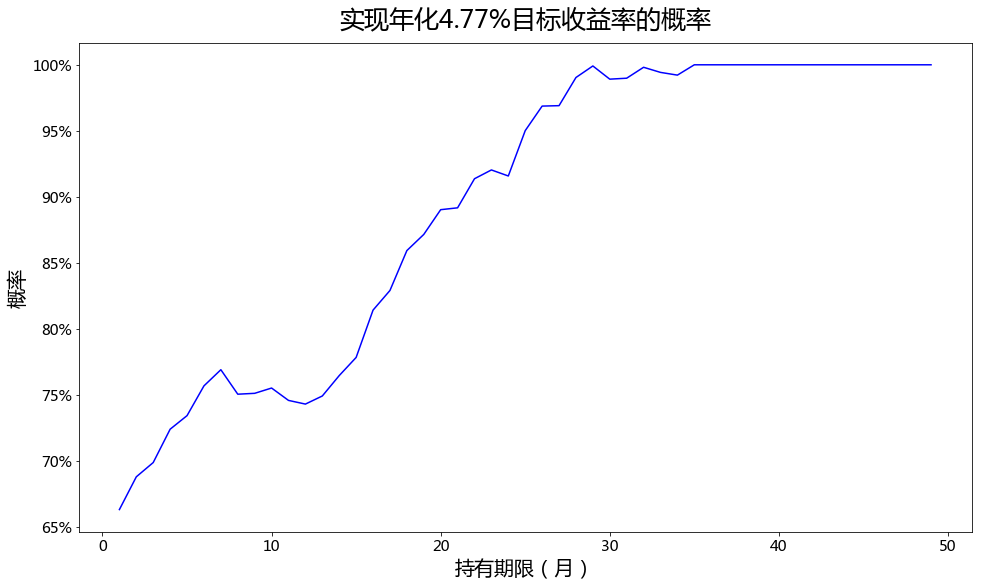

In [223]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(probability.index / 20, probability, color='blue')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_xlabel(u'持有期限（月）', fontsize=20)
ax.set_ylabel(u'概率', fontsize=20)

_ = ax.set_title(u'实现年化%.2f%%目标收益率的概率'%(target*100), fontsize=25, y=1.02)

In [224]:
# probability.name = '1090'
# probability.to_excel(u'../data/1090实现概率.xlsx')

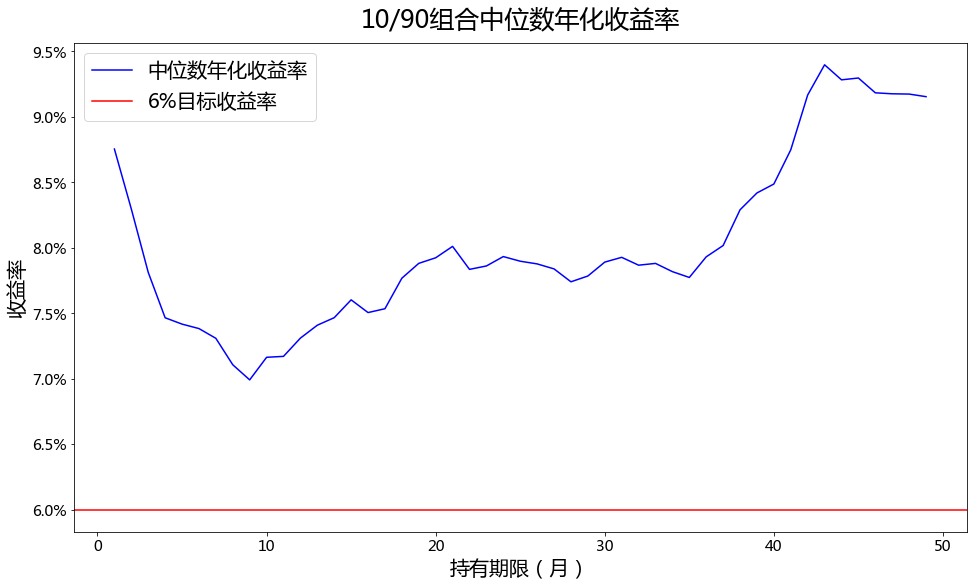

In [225]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot(ann_ret_df.columns / 20, ann_ret_df.mean(axis=0), color='red', label=u'平均年化收益率')
ax.plot(ann_ret_df.columns / 20, ann_ret_df.median(axis=0), color='blue', label=u'中位数年化收益率')
ax.axhline(y=0.06, color='red', label=u'6%目标收益率')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.1f}%'.format(x*100) for x in vals])
ax.set_xlabel(u'持有期限（月）', fontsize=20)
ax.set_ylabel(u'收益率', fontsize=20)
ax.legend(fontsize=20)

_ = ax.set_title(u'10/90组合中位数年化收益率', fontsize=25, y=1.02)

In [226]:
df = pd.read_excel('../data/2080_portRets.xlsx')

In [227]:
ret = df[u'market_li']

In [228]:
empyrical.annual_return(ret)

0.09839600981222563

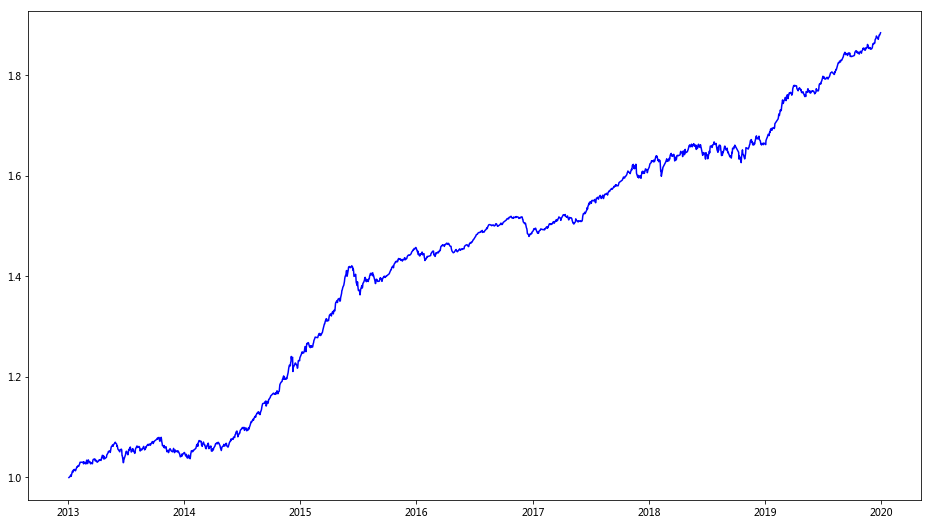

In [229]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot((1+ret).cumprod(), color='blue')

In [230]:
window = 243
his_ann_ret = ret.rolling(window).apply(lambda x: empyrical.annual_return(x)).shift(-window)

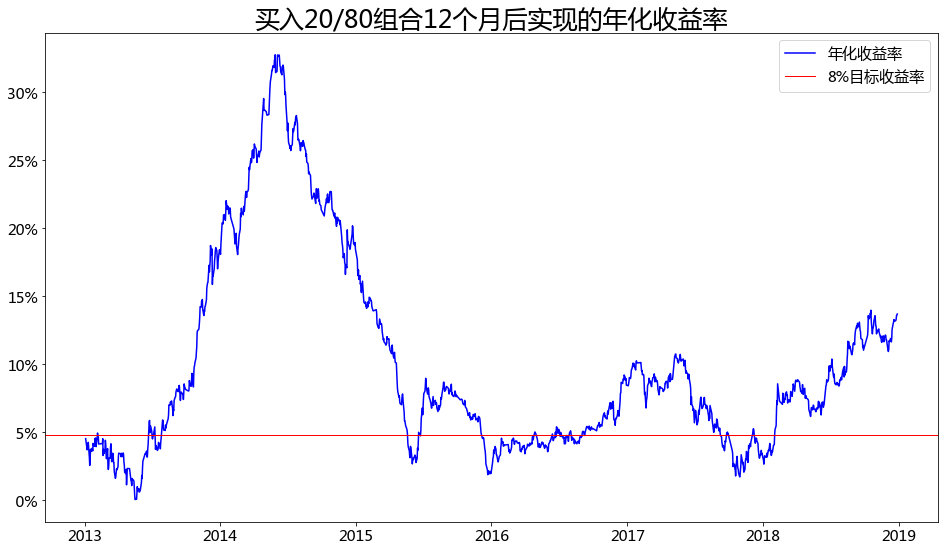

In [231]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(his_ann_ret, color='blue', label=u'年化收益率')
ax.axhline(y=0.0477, color='red', linewidth=1, label=u'8%目标收益率')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.legend(fontsize=15)

# Title
_ = ax.set_title(u'买入20/80组合%d个月后实现的年化收益率'%(window/20), fontsize=25)

[Text(0,0,'-5.0%'),
 Text(0,0,'0.0%'),
 Text(0,0,'5.0%'),
 Text(0,0,'10.0%'),
 Text(0,0,'15.0%'),
 Text(0,0,'20.0%'),
 Text(0,0,'25.0%'),
 Text(0,0,'30.0%'),
 Text(0,0,'35.0%')]

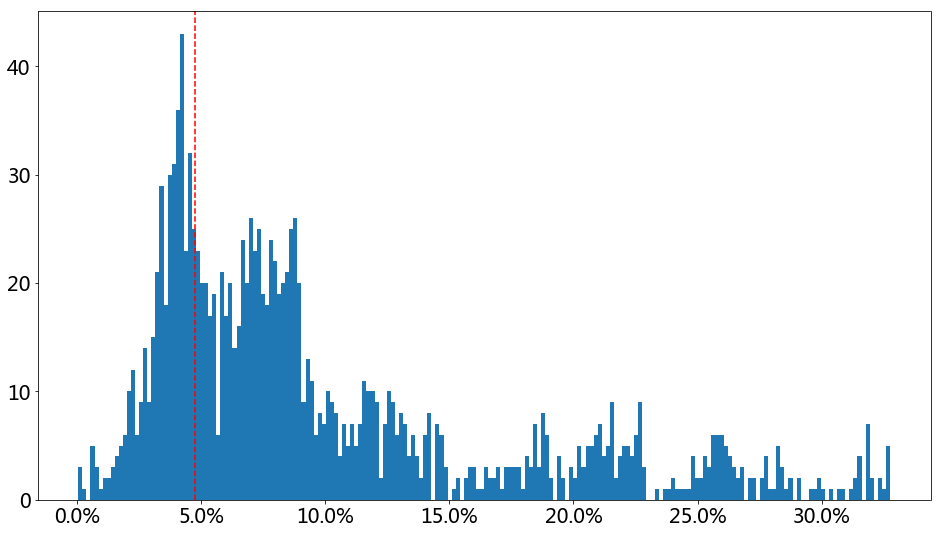

In [232]:
fig, ax = plt.subplots(figsize=(16, 9))

# h = sorted(his_ann_ret.dropna().values)
# fit = stats.norm.pdf(h, np.mean(h), np.std(h))

# top = 22.5
# ax.plot(h, fit, color='blue')
ax.hist(his_ann_ret.dropna(), bins=200)
ax.axvline(x=0.0477, linestyle='--', color='red')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_xticks()
ax.set_xticklabels(['{:2.1f}%'.format(x*100) for x in vals])

In [233]:
target = 0.0477
probability = pd.Series(index = range(20, 1000, 20))
ann_ret_df = pd.DataFrame(index = ret.index, columns=probability.index)
for window in probability.index:
    his_ann_ret = ret.rolling(window).apply(lambda x: empyrical.annual_return(x))
    probability.loc[window] = (his_ann_ret[his_ann_ret >= target].shape[0] + 1) / (his_ann_ret.dropna().shape[0] + 1)
    ann_ret_df[window] = ret.rolling(window).apply(lambda x: empyrical.annual_return(x)).shift(-window)

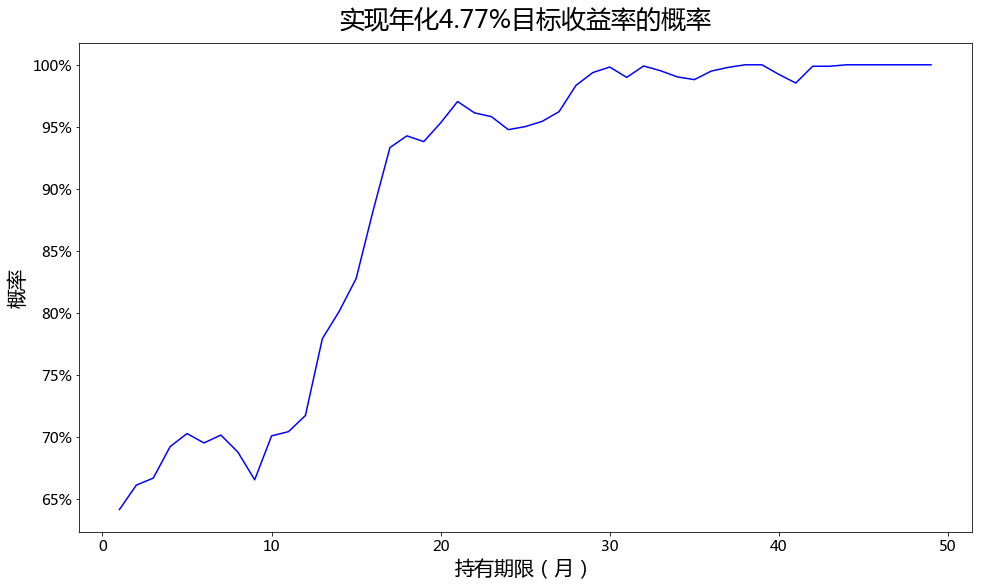

In [234]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(probability.index / 20, probability, color='blue')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_xlabel(u'持有期限（月）', fontsize=20)
ax.set_ylabel(u'概率', fontsize=20)

_ = ax.set_title(u'实现年化%.2f%%目标收益率的概率'%(target*100), fontsize=25, y=1.02)

In [121]:
# probability.name = '2080'
# probability.to_excel(u'../data/2080实现概率.xlsx')

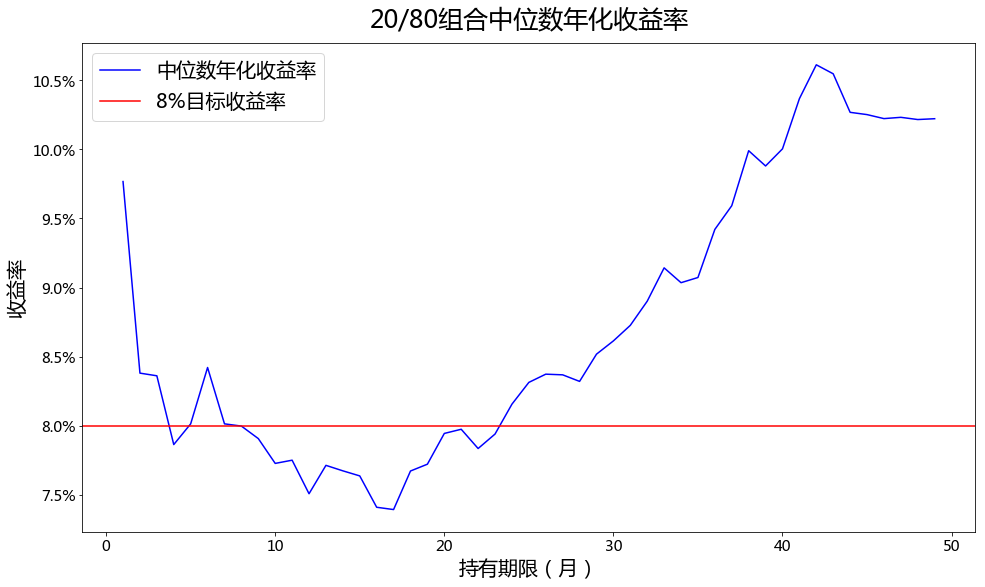

In [122]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot(ann_ret_df.columns / 20, ann_ret_df.mean(axis=0), color='red', label=u'平均年化收益率')
ax.plot(ann_ret_df.columns / 20, ann_ret_df.median(axis=0), color='blue', label=u'中位数年化收益率')
ax.axhline(y=0.08, color='red', label=u'8%目标收益率')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.1f}%'.format(x*100) for x in vals])
ax.set_xlabel(u'持有期限（月）', fontsize=20)
ax.set_ylabel(u'收益率', fontsize=20)
ax.legend(fontsize=20)

_ = ax.set_title(u'20/80组合中位数年化收益率', fontsize=25, y=1.02)

In [123]:
df = pd.read_excel('../data/4060_portRets.xlsx')

In [124]:
ret = df[u'market_li']

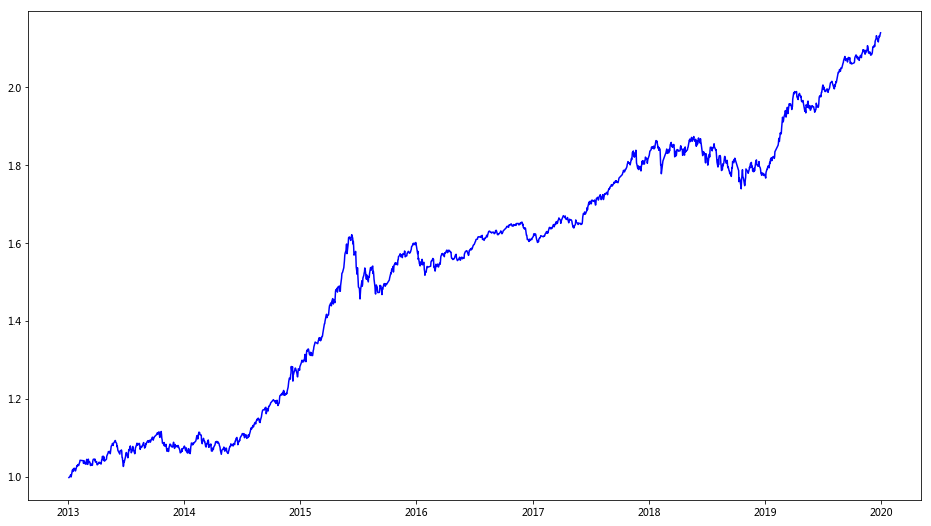

In [125]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot((1+ret).cumprod(), color='blue')

In [126]:
window = 243
his_ann_ret = ret.rolling(window).apply(lambda x: empyrical.annual_return(x)).shift(-window)

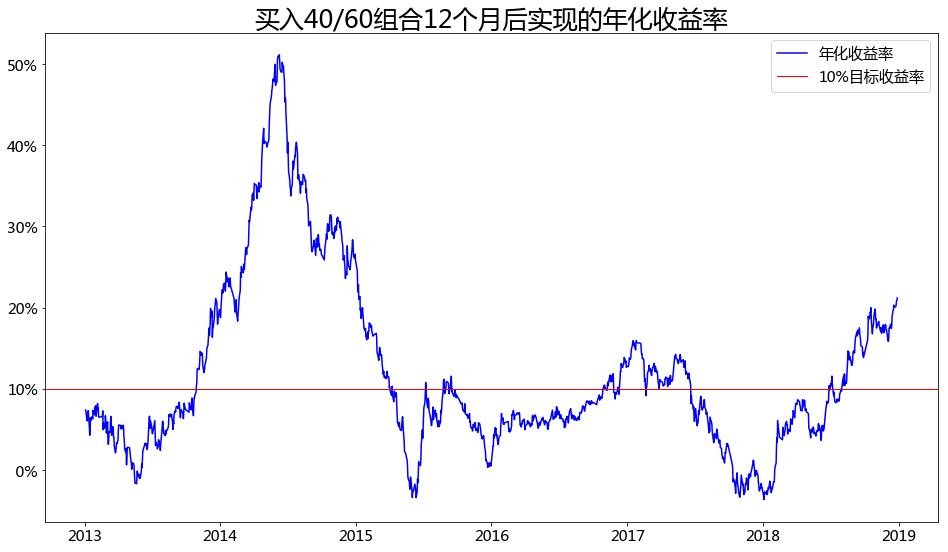

In [127]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(his_ann_ret, color='blue', label=u'年化收益率')
ax.axhline(y=0.1, color='red', linewidth=1, label=u'10%目标收益率')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.legend(fontsize=15)

# Title
_ = ax.set_title(u'买入40/60组合%d个月后实现的年化收益率'%(window/20), fontsize=25)

In [128]:
target = 0.1
probability = pd.Series(index = range(20, 1000, 20))
ann_ret_df = pd.DataFrame(index = ret.index, columns=probability.index)
for window in probability.index:
    his_ann_ret = ret.rolling(window).apply(lambda x: empyrical.annual_return(x))
    probability.loc[window] = (his_ann_ret[his_ann_ret >= target].shape[0] + 1) / (his_ann_ret.dropna().shape[0] + 1)
    ann_ret_df[window] = ret.rolling(window).apply(lambda x: empyrical.annual_return(x)).shift(-window)

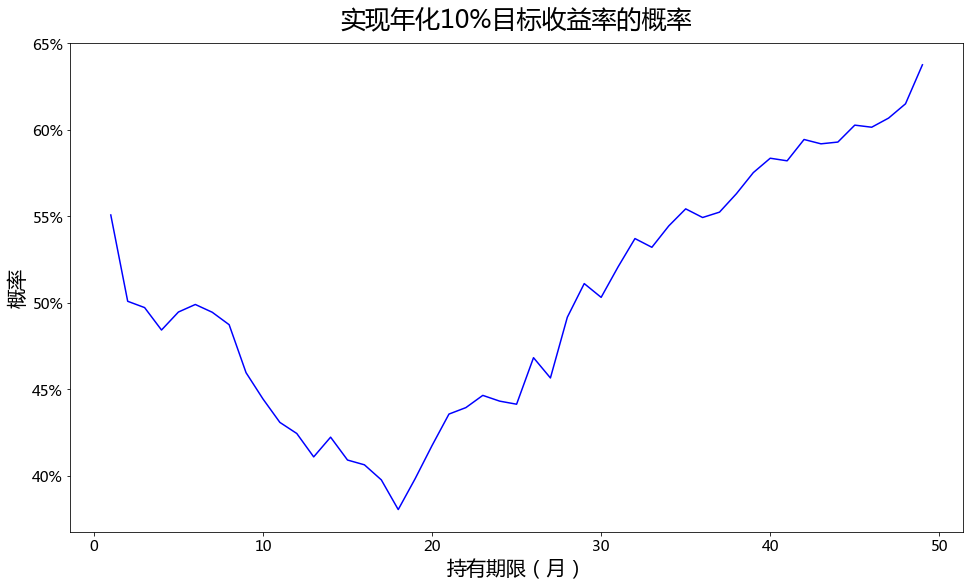

In [129]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(probability.index / 20, probability, color='blue')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_xlabel(u'持有期限（月）', fontsize=20)
ax.set_ylabel(u'概率', fontsize=20)

_ = ax.set_title(u'实现年化10%目标收益率的概率', fontsize=25, y=1.02)

In [130]:
# probability.name = '4060'
# probability.to_excel(u'../data/4060实现概率.xlsx')

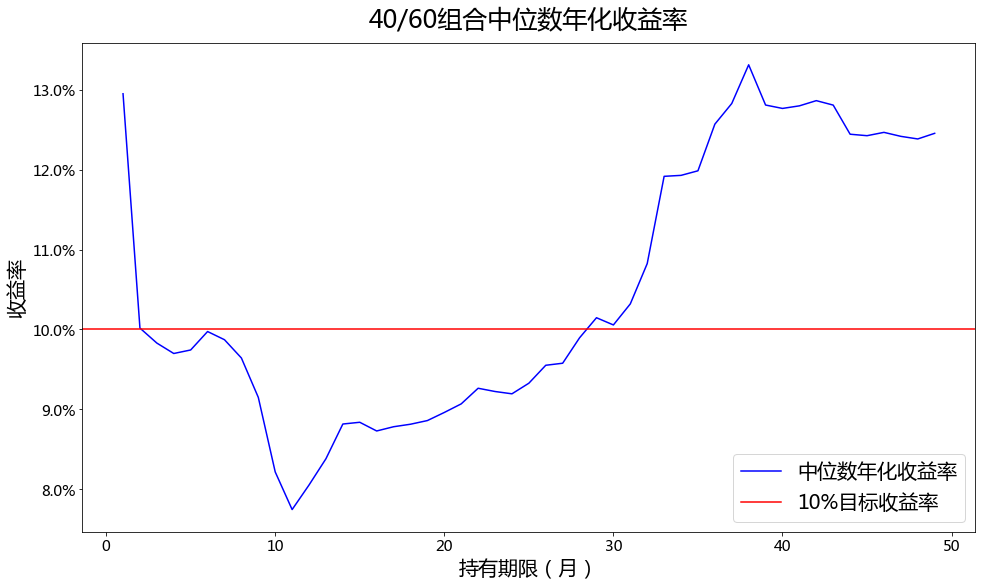

In [131]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot(ann_ret_df.columns / 20, ann_ret_df.mean(axis=0), color='red', label=u'平均年化收益率')
ax.plot(ann_ret_df.columns / 20, ann_ret_df.median(axis=0), color='blue', label=u'中位数年化收益率')
ax.axhline(y=0.1, color='red', label=u'10%目标收益率')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.1f}%'.format(x*100) for x in vals])
ax.set_xlabel(u'持有期限（月）', fontsize=20)
ax.set_ylabel(u'收益率', fontsize=20)
ax.legend(fontsize=20)

_ = ax.set_title(u'40/60组合中位数年化收益率', fontsize=25, y=1.02)